In [2]:
import numpy as np
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

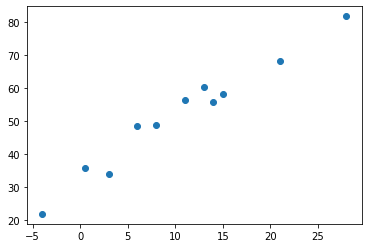

In [3]:
import matplotlib.pyplot as plt

plt.scatter(t_c, t_u)

In [4]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w = torch.ones(()) # 0 dimension tensor for just a single tensor
w, w.size(), w.dtype, w.dim()
b = torch.zeros(())


In [5]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [7]:
a = torch.Tensor([[1,2,3]])
b = torch.Tensor([[1],[2],[3]])
a.shape, b.shape, a*b

(torch.Size([1, 3]),
 torch.Size([3, 1]),
 tensor([[1., 2., 3.],
         [2., 4., 6.],
         [3., 6., 9.]]))

In [8]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
    loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
    
loss_rate_of_change_w

tensor(4724.4980)

In [9]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [10]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (delta * 2.0)
    
loss_rate_of_change_b

tensor(-4812.5000)

In [11]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    # at this point we have the derivatives from each element of t_u separately
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])


In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(n_epochs):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        print(f'Epoch {epoch}, Loss {torch.round(loss)}')
        print(f'    Params: {params}')
        print(f'    Grad: {grad}')
    
    return params

In [13]:
training_loop(n_epochs=100,
              learning_rate=0.0001,
              params = torch.Tensor([0, 0]),
              t_u=t_u,
              t_c=t_c)


Epoch 0, Loss 187.0
    Params: tensor([0.1364, 0.0021])
    Grad: tensor([-1364.3002,   -21.0000])
Epoch 1, Loss 56.0
    Params: tensor([0.1926, 0.0028])
    Grad: tensor([-561.6561,   -6.8617])
Epoch 2, Loss 34.0
    Params: tensor([0.2157, 0.0029])
    Grad: tensor([-231.2415,   -1.0415])
Epoch 3, Loss 30.0
    Params: tensor([0.2252, 0.0028])
    Grad: tensor([-95.2238,   1.3544])
Epoch 4, Loss 29.0
    Params: tensor([0.2292, 0.0025])
    Grad: tensor([-39.2310,   2.3406])
Epoch 5, Loss 29.0
    Params: tensor([0.2308, 0.0022])
    Grad: tensor([-16.1812,   2.7466])
Epoch 6, Loss 29.0
    Params: tensor([0.2315, 0.0020])
    Grad: tensor([-6.6926,  2.9137])
Epoch 7, Loss 29.0
    Params: tensor([0.2317, 0.0017])
    Grad: tensor([-2.7864,  2.9824])
Epoch 8, Loss 29.0
    Params: tensor([0.2318, 0.0014])
    Grad: tensor([-1.1785,  3.0107])
Epoch 9, Loss 29.0
    Params: tensor([0.2319, 0.0011])
    Grad: tensor([-0.5165,  3.0223])
Epoch 10, Loss 29.0
    Params: tensor([0.2319, 0

tensor([ 0.2324, -0.0262])

In [14]:
t_un = .1 * t_u
t_un

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [15]:
training_loop(n_epochs=100,
              learning_rate=1e-2,
              params = torch.Tensor([0, 0]),
              t_u=t_un,
              t_c=t_c)


Epoch 0, Loss 187.0
    Params: tensor([1.3643, 0.2100])
    Grad: tensor([-136.4300,  -21.0000])
Epoch 1, Loss 55.0
    Params: tensor([1.9044, 0.2745])
    Grad: tensor([-54.0118,  -6.4459])
Epoch 2, Loss 34.0
    Params: tensor([2.1202, 0.2817])
    Grad: tensor([-21.5764,  -0.7213])
Epoch 3, Loss 31.0
    Params: tensor([2.2083, 0.2664])
    Grad: tensor([-8.8113,  1.5284])
Epoch 4, Loss 30.0
    Params: tensor([2.2462, 0.2423])
    Grad: tensor([-3.7872,  2.4107])
Epoch 5, Loss 30.0
    Params: tensor([2.2643, 0.2147])
    Grad: tensor([-1.8095,  2.7549])
Epoch 6, Loss 30.0
    Params: tensor([2.2746, 0.1859])
    Grad: tensor([-1.0306,  2.8872])
Epoch 7, Loss 30.0
    Params: tensor([2.2818, 0.1565])
    Grad: tensor([-0.7236,  2.9362])
Epoch 8, Loss 30.0
    Params: tensor([2.2878, 0.1270])
    Grad: tensor([-0.6022,  2.9525])
Epoch 9, Loss 30.0
    Params: tensor([2.2934, 0.0974])
    Grad: tensor([-0.5539,  2.9558])
Epoch 10, Loss 29.0
    Params: tensor([2.2987, 0.0679])
    

tensor([ 2.7297, -2.3717])

In [18]:
params = training_loop(
    n_epochs=10000,
    learning_rate=0.01,
    params = torch.Tensor([0, 0]),
    t_u=t_un,
    t_c=t_c)

params

Epoch 0, Loss 187.0
    Params: tensor([1.3643, 0.2100])
    Grad: tensor([-136.4300,  -21.0000])
Epoch 1, Loss 55.0
    Params: tensor([1.9044, 0.2745])
    Grad: tensor([-54.0118,  -6.4459])
Epoch 2, Loss 34.0
    Params: tensor([2.1202, 0.2817])
    Grad: tensor([-21.5764,  -0.7213])
Epoch 3, Loss 31.0
    Params: tensor([2.2083, 0.2664])
    Grad: tensor([-8.8113,  1.5284])
Epoch 4, Loss 30.0
    Params: tensor([2.2462, 0.2423])
    Grad: tensor([-3.7872,  2.4107])
Epoch 5, Loss 30.0
    Params: tensor([2.2643, 0.2147])
    Grad: tensor([-1.8095,  2.7549])
Epoch 6, Loss 30.0
    Params: tensor([2.2746, 0.1859])
    Grad: tensor([-1.0306,  2.8872])
Epoch 7, Loss 30.0
    Params: tensor([2.2818, 0.1565])
    Grad: tensor([-0.7236,  2.9362])
Epoch 8, Loss 30.0
    Params: tensor([2.2878, 0.1270])
    Grad: tensor([-0.6022,  2.9525])
Epoch 9, Loss 30.0
    Params: tensor([2.2934, 0.0974])
    Grad: tensor([-0.5539,  2.9558])
Epoch 10, Loss 29.0
    Params: tensor([2.2987, 0.0679])
    

tensor([  5.3676, -17.3042])

In [20]:
params


tensor([  5.3676, -17.3042])

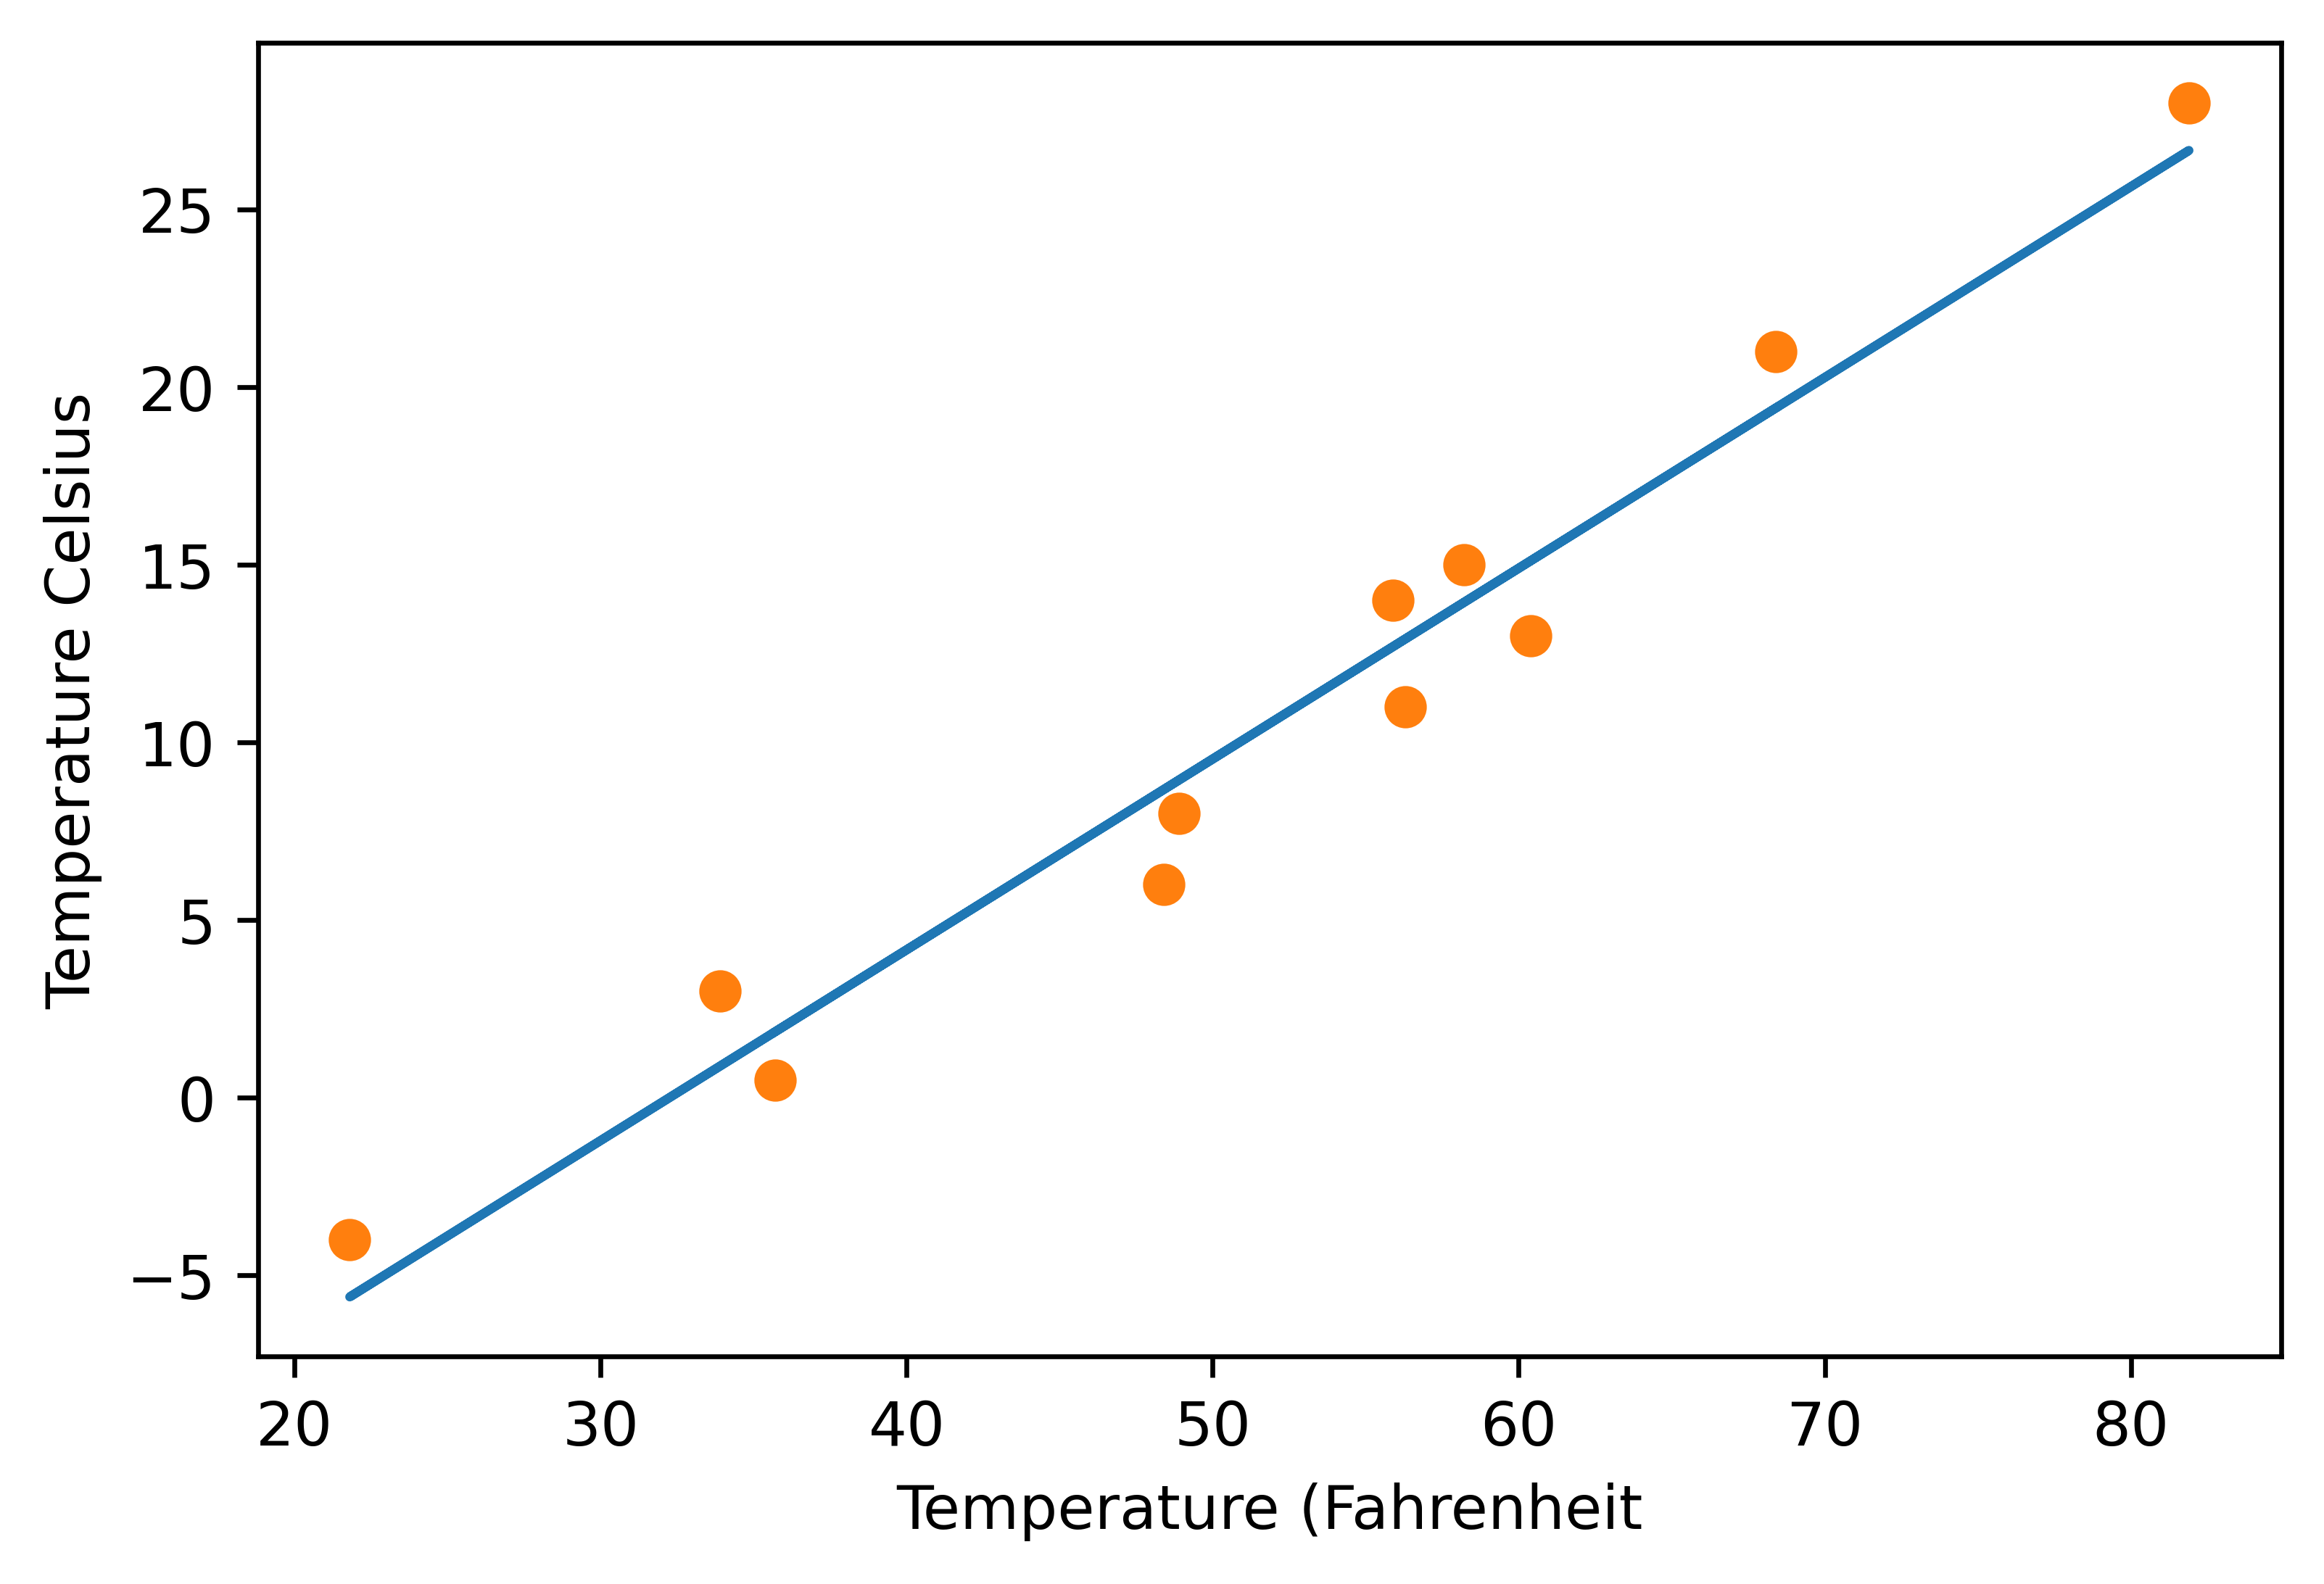

In [31]:
%matplotlib inline

t_p = model(t_un, *params) # unpacking with tensors is along the first dimension
# so its like params[0], params[1] etc

fig = plt.figure(dpi=600) #dpi is dots per inch
plt.xlabel("Temperature (Fahrenheit")
plt.ylabel("Temperature Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [35]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
# tracks the whole tree of tensors resulting from
# operations on params

params.grad 

In [37]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([9034.5938,  165.2000])

In [38]:
# must zero your tensor gradients!
if params.grad is not None:
    params.grad.zero_()

In [39]:
# rewriting training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        # bit weird with the no_grad() but I guess you don't want
        # a loop where the learning rate gets back into your gradient
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params


In [45]:
training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([0.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 7.957001
Epoch 1000, Loss 3.846232
Epoch 1500, Loss 3.095423
Epoch 2000, Loss 2.958291
Epoch 2500, Loss 2.933243
Epoch 3000, Loss 2.928668
Epoch 3500, Loss 2.927833
Epoch 4000, Loss 2.927681
Epoch 4500, Loss 2.927653
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [47]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [52]:
# doing it again with the SGD optimizer

def training_loop2(n_epochs, params, t_u, t_c, optimizer):
    for epoch in range(n_epochs):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() #once created, optimizer object is linked to the model
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params


In [56]:
params = torch.tensor([0., 0.], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop2(
    n_epochs=10000,
    params=params,
    t_u=t_u,
    t_c=t_c,
    optimizer=optimizer
)

Epoch 0, Loss 187.386368
Epoch 500, Loss 3.077850
Epoch 1000, Loss 2.927648
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927646
Epoch 2500, Loss 2.927646
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927646
Epoch 4000, Loss 2.927647
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645
Epoch 5500, Loss 2.927647
Epoch 6000, Loss 2.927646
Epoch 6500, Loss 2.927645
Epoch 7000, Loss 2.927647
Epoch 7500, Loss 2.927645
Epoch 8000, Loss 2.927692
Epoch 8500, Loss 2.927646
Epoch 9000, Loss 2.927647
Epoch 9500, Loss 2.927727


tensor([  0.5368, -17.3048], requires_grad=True)

In [69]:
t_u.shape
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
shuffled_indices

train_indices = shuffled_indices[:-n_val]
validation_indices = shuffled_indices[-n_val:]

train_indices, validation_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[validation_indices]
val_t_c = t_c[validation_indices]

def training_loop3(n_epochs, optimizer, params, train_t_u,
                   train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        
        optimizer.step()
        
        if epoch % 500 == 0:
            with torch.no_grad():
                val_t_p = model(val_t_u, *params)
                val_loss = loss_fn(val_t_p, val_t_c)
                assert val_loss.requires_grad == False
                
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f}')
            print(f'    Validation loss {val_loss.item():.4f}')
    
    return params



In [72]:
params = torch.tensor([0., 0.], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop3(
    n_epochs=10000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_u,
    train_t_c=train_t_c,
    val_t_u=val_t_u,
    val_t_c=val_t_c
)

Epoch 500, Training loss 3.3503
    Validation loss 2.7295
Epoch 1000, Training loss 3.2093
    Validation loss 1.8614
Epoch 1500, Training loss 3.2093
    Validation loss 1.8585
Epoch 2000, Training loss 3.2093
    Validation loss 1.8585
Epoch 2500, Training loss 3.2093
    Validation loss 1.8585
Epoch 3000, Training loss 3.2093
    Validation loss 1.8585
Epoch 3500, Training loss 3.2093
    Validation loss 1.8583
Epoch 4000, Training loss 3.2093
    Validation loss 1.8585
Epoch 4500, Training loss 3.2093
    Validation loss 1.8585
Epoch 5000, Training loss 3.2093
    Validation loss 1.8585
Epoch 5500, Training loss 3.4980
    Validation loss 2.2848
Epoch 6000, Training loss 3.2093
    Validation loss 1.8578
Epoch 6500, Training loss 3.2093
    Validation loss 1.8585
Epoch 7000, Training loss 3.4305
    Validation loss 2.1037
Epoch 7500, Training loss 3.2116
    Validation loss 1.8560
Epoch 8000, Training loss 3.2093
    Validation loss 1.8584
Epoch 8500, Training loss 3.2093
    Vali

tensor([  0.5253, -16.6644], requires_grad=True)

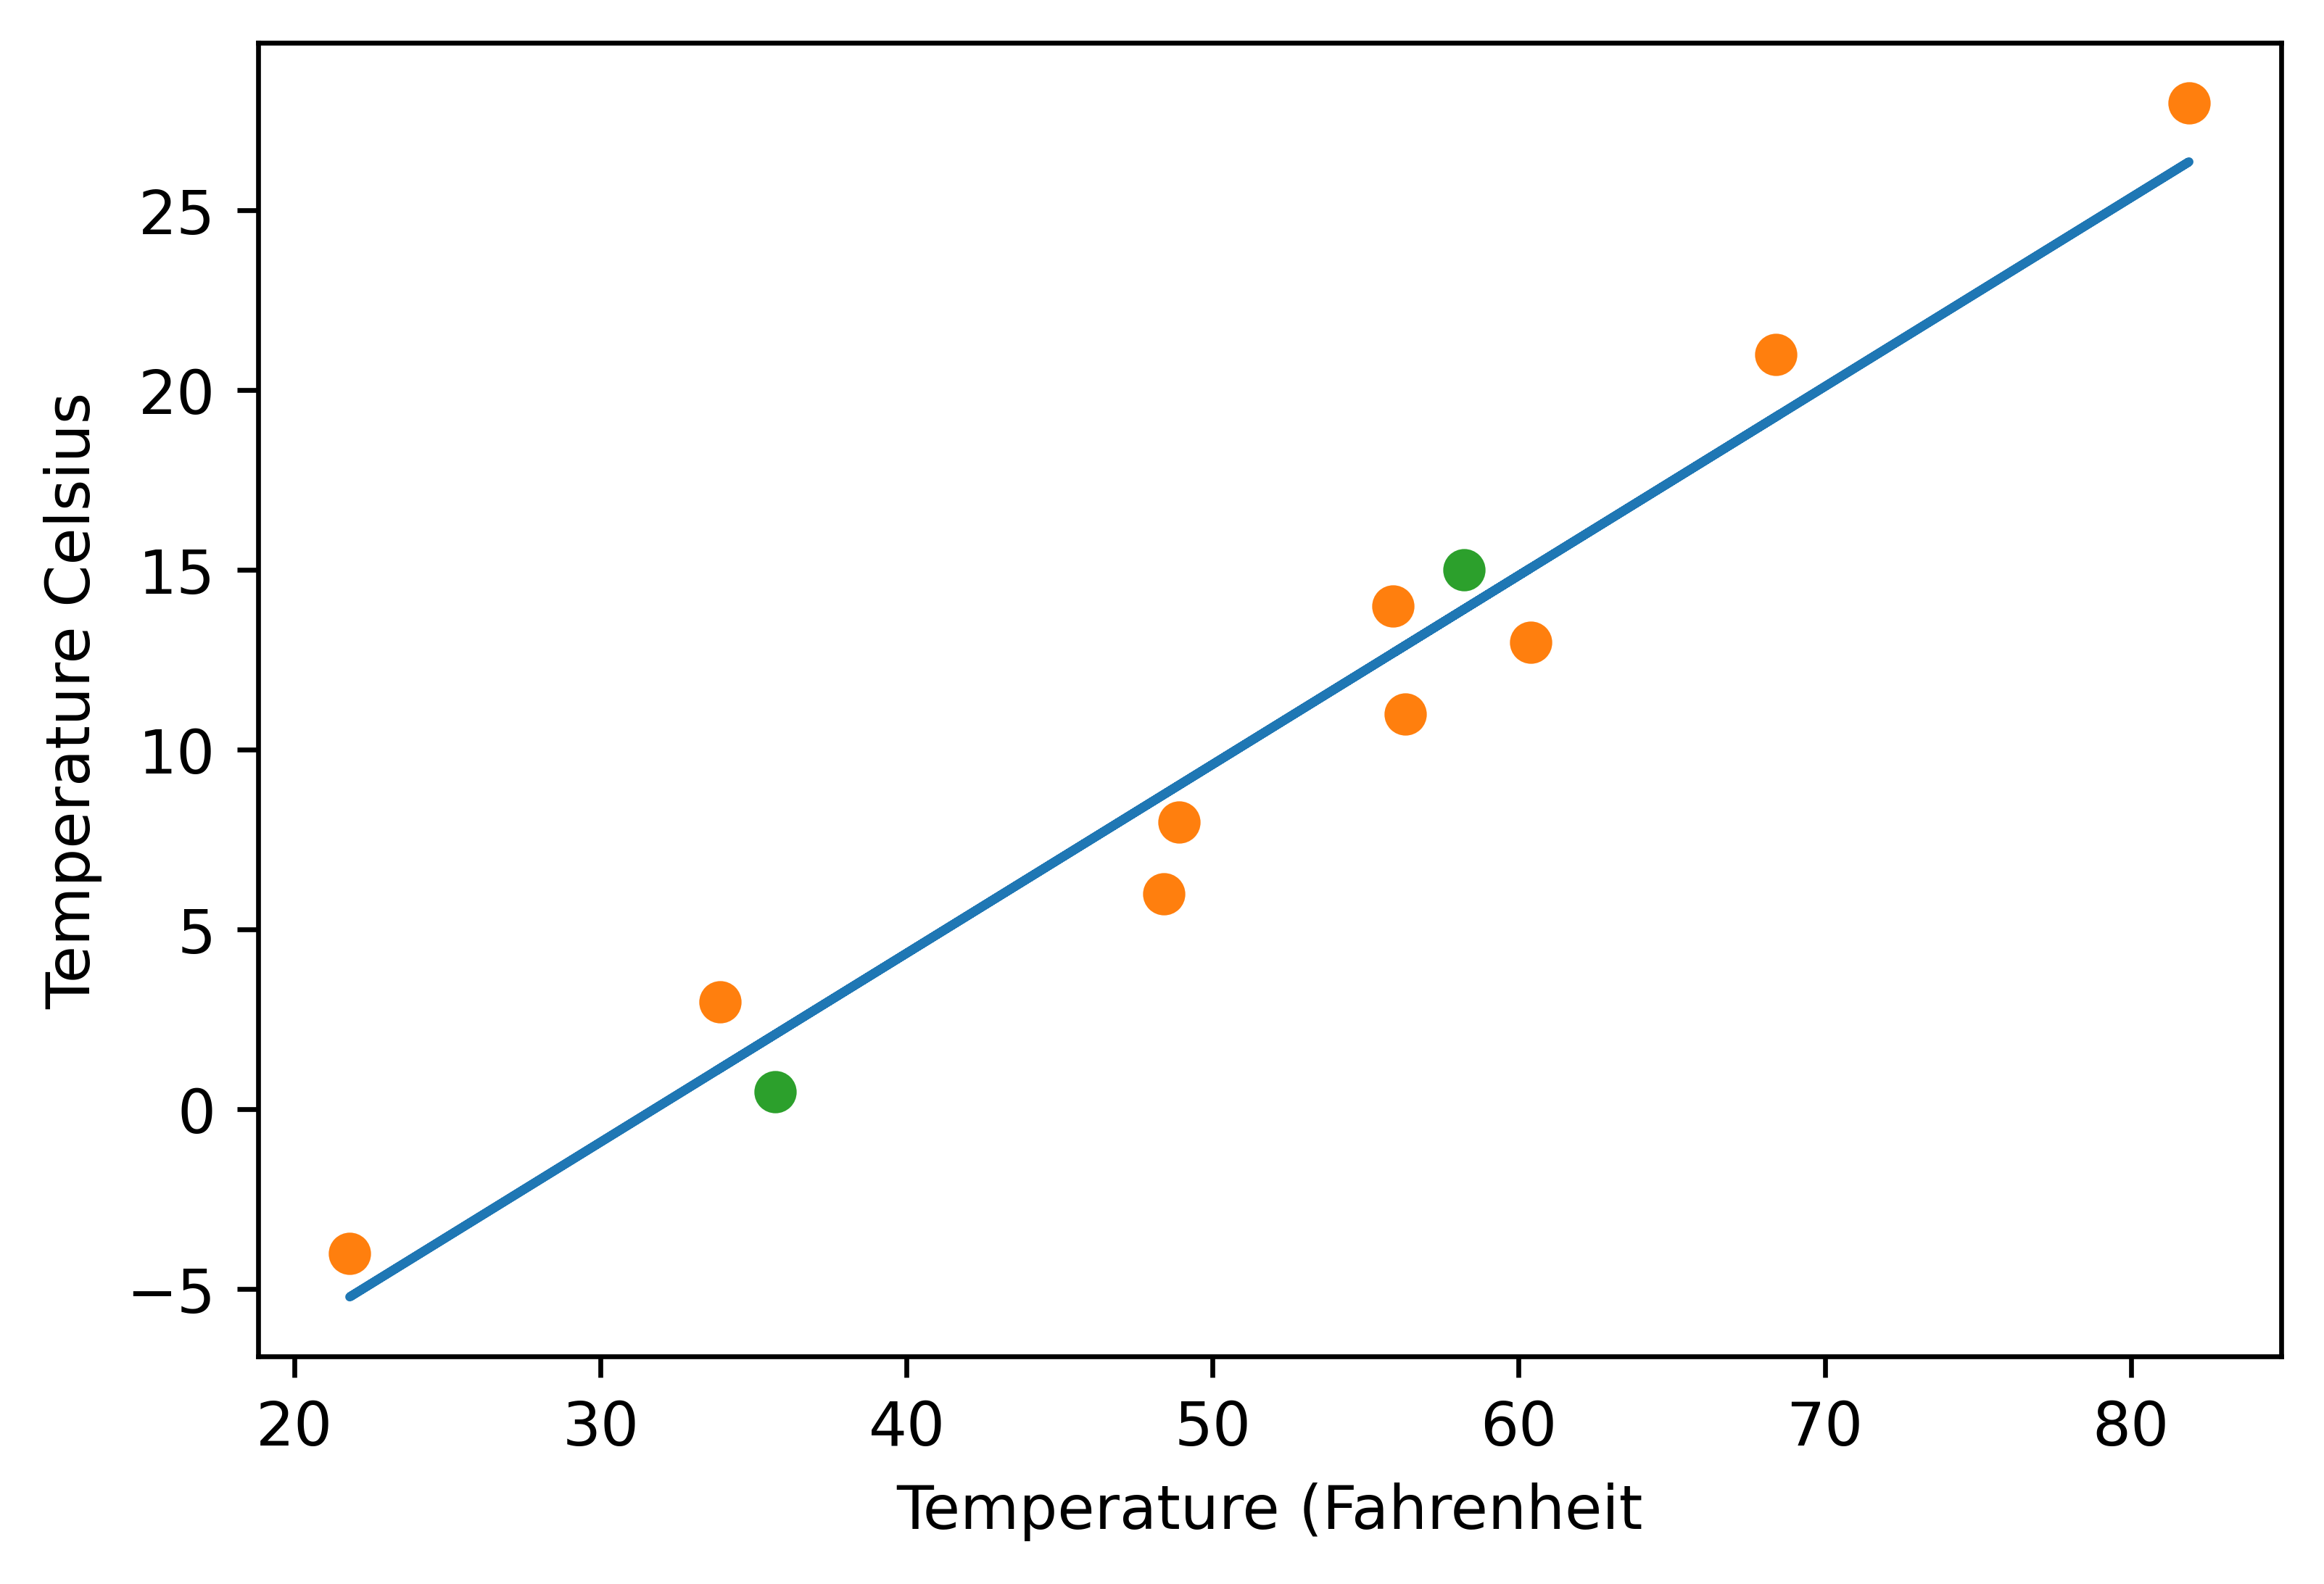

In [71]:
train_t_p = model(train_t_u, *params)
val_t_p = model(val_t_u, *params)

fig = plt.figure(dpi=600) #dpi is dots per inch
plt.xlabel("Temperature (Fahrenheit")
plt.ylabel("Temperature Celsius")
plt.plot(train_t_u.numpy(), train_t_p.detach().numpy())
plt.plot(train_t_u.numpy(), train_t_c.numpy(), 'o')
plt.plot(val_t_u.numpy(), val_t_c.numpy(), 'o')

In [73]:
# Should always use detach() when taking an output that shouldn't
# be part of computation trees, can be cases where requires_grad is True
# even within no_grad

# can also make grad optional within model as so
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
    return loss

Epoch 500, Training loss 3.3664
    Validation loss 5.1514
Epoch 1000, Training loss 3.1994
    Validation loss 4.9696
Epoch 1500, Training loss 3.0055
    Validation loss 4.7527
Epoch 2000, Training loss 2.8394
    Validation loss 4.5719
Epoch 2500, Training loss 2.6977
    Validation loss 4.3721
Epoch 3000, Training loss 2.5808
    Validation loss 4.2169
Epoch 3500, Training loss 2.4822
    Validation loss 4.0721
Epoch 4000, Training loss 2.4019
    Validation loss 3.9366
Epoch 4500, Training loss 2.3709
    Validation loss 3.4749
Epoch 5000, Training loss 2.2786
    Validation loss 3.7094
Epoch 5500, Training loss 2.2327
    Validation loss 3.6175
Epoch 6000, Training loss 2.2771
    Validation loss 3.1950
Epoch 6500, Training loss 2.1627
    Validation loss 3.4564
Epoch 7000, Training loss 2.1616
    Validation loss 3.1173
Epoch 7500, Training loss 2.1145
    Validation loss 3.3310
Epoch 8000, Training loss 2.0964
    Validation loss 3.2681
Epoch 8500, Training loss 2.0815
    Vali

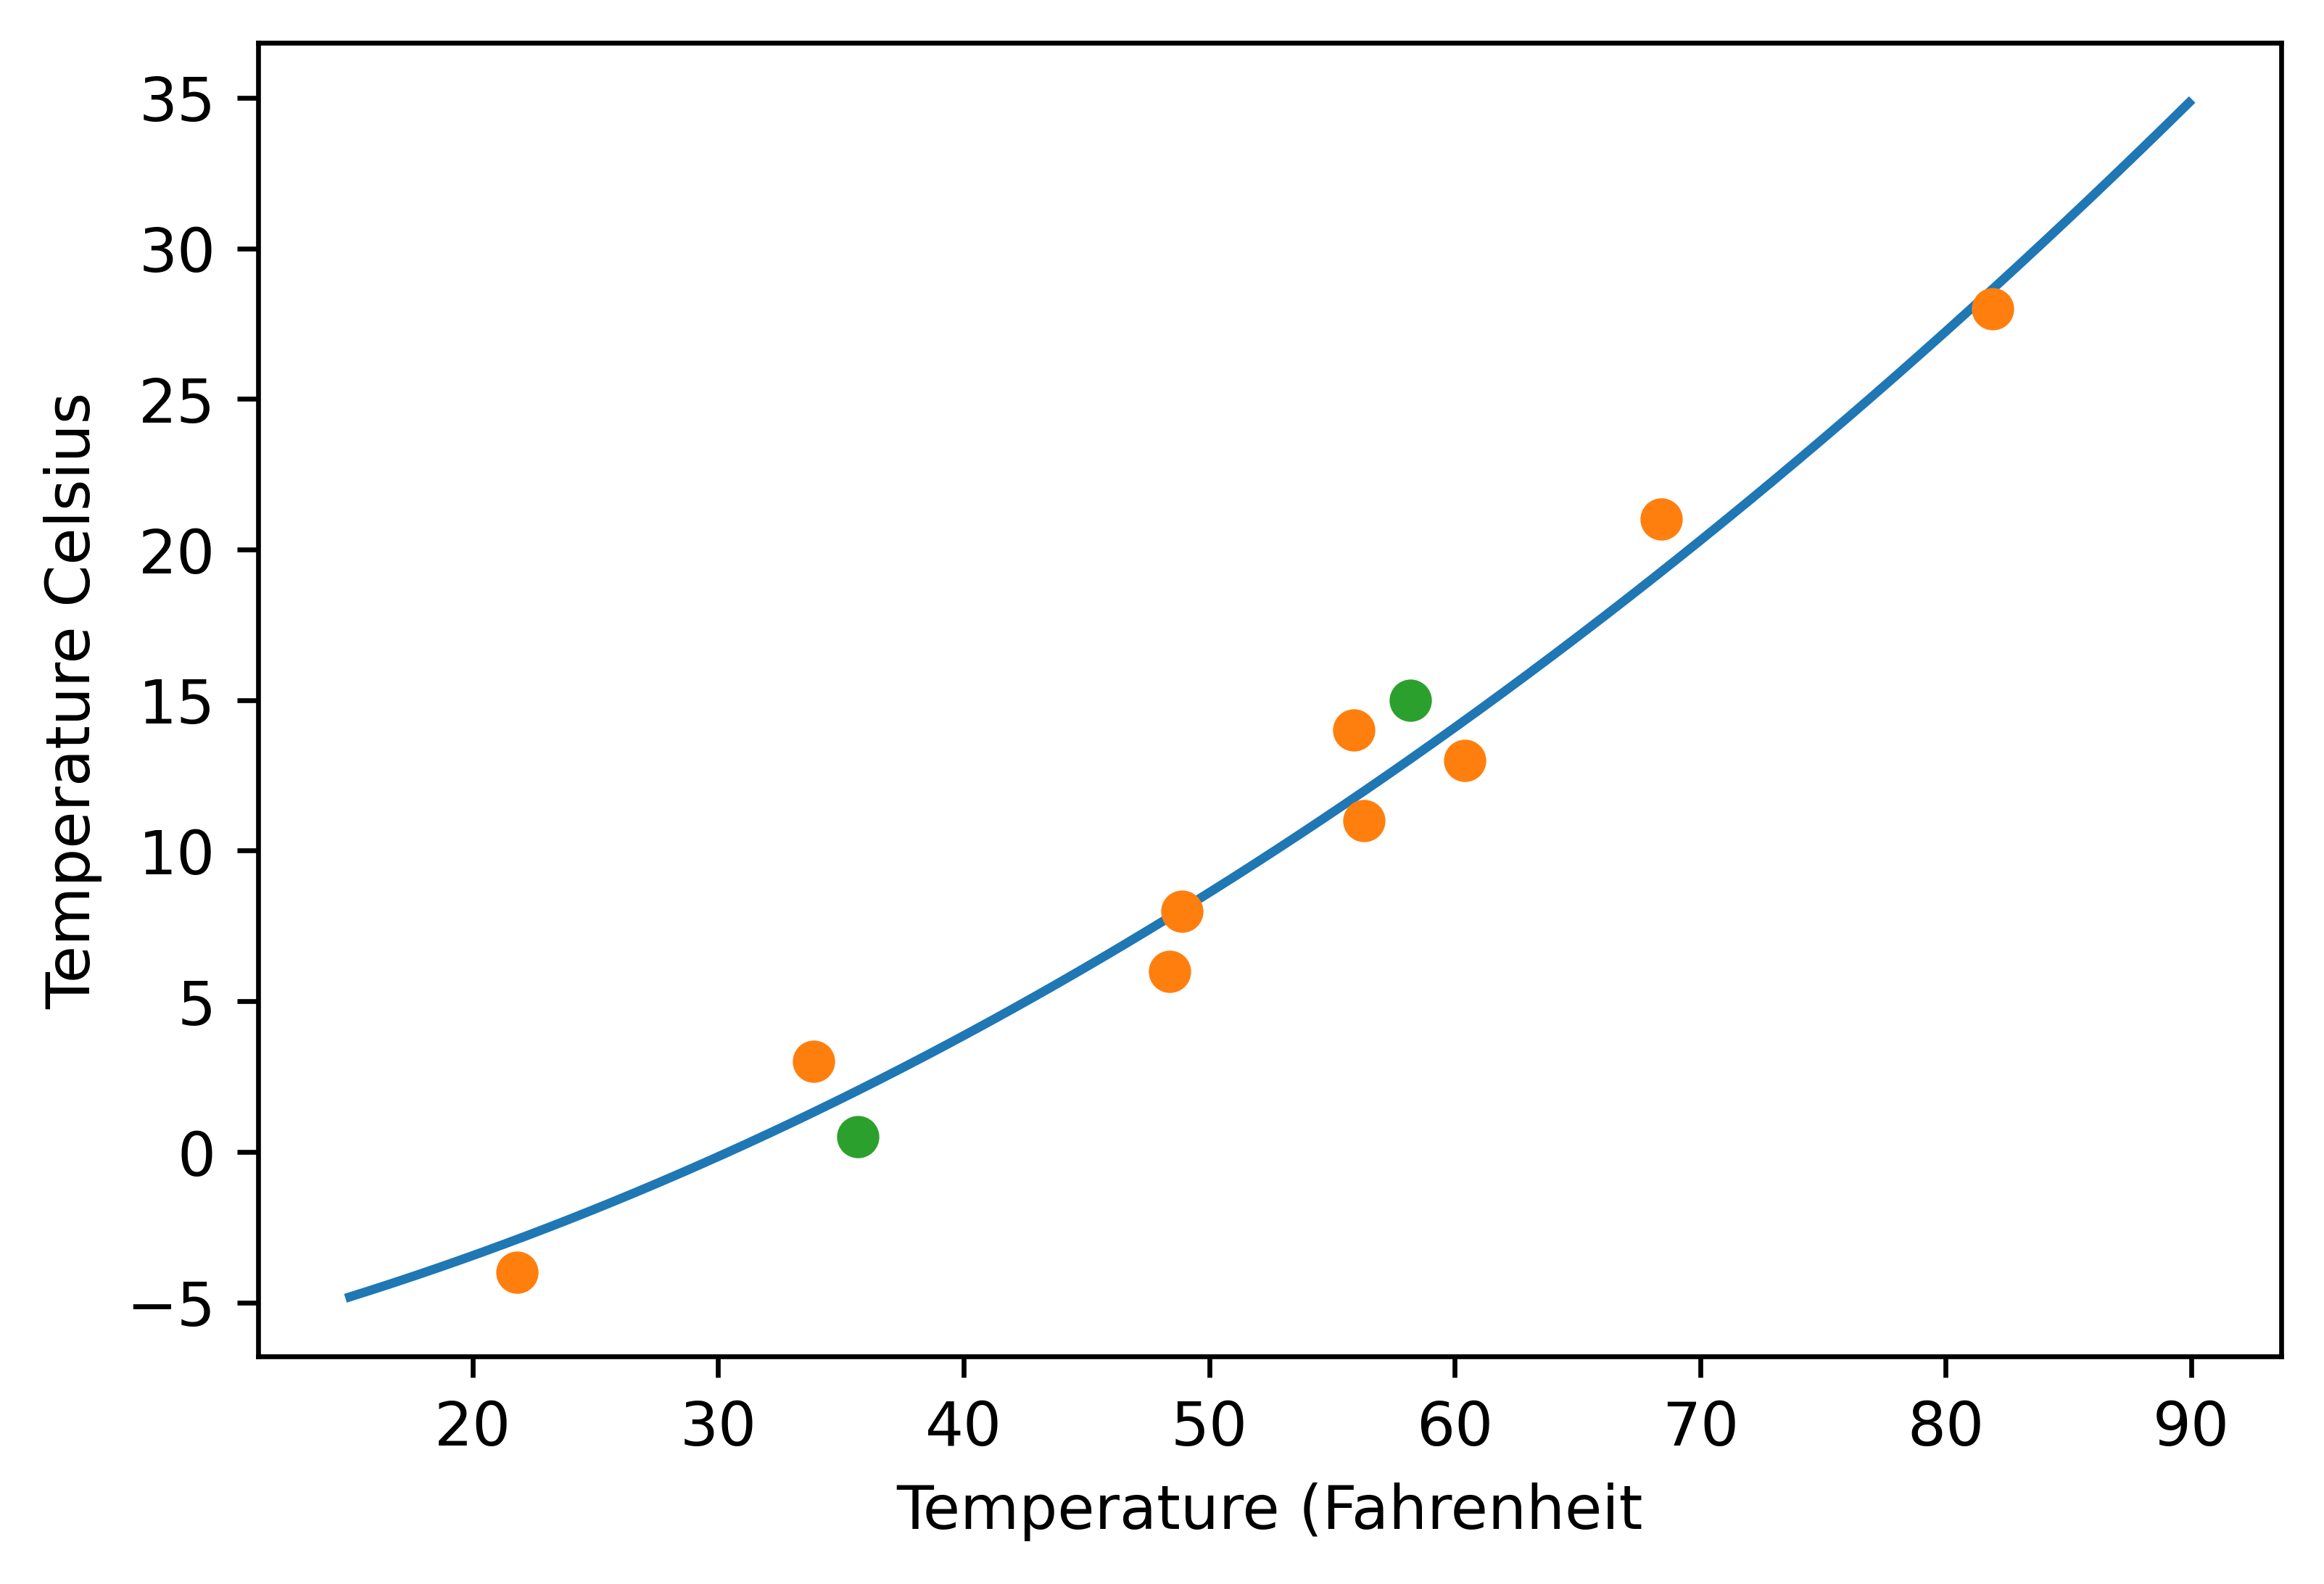

In [84]:
# Exercise

# 1. Redefine the model to be `w2 * t_u ** 2 + w1 * t_u + b`.

# a. What parts of the training loop, and so on, need to change 
# to accommodate this redefinition?

# Model needs to change
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

params = torch.tensor([0., 0., 0.], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)

training_loop3(
    n_epochs=10000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_u,
    train_t_c=train_t_c,
    val_t_u=val_t_u,
    val_t_c=val_t_c
)

train_t_p = model(train_t_u, *params)
val_t_p = model(val_t_u, *params)

fig = plt.figure(dpi=600) #dpi is dots per inch
plt.xlabel("Temperature (Fahrenheit")
plt.ylabel("Temperature Celsius")
plt.plot(np.arange(15, 90, 0.1), [model(torch.tensor(a), *params.detach()) for a in np.arange(15, 90, 0.1)])
plt.plot(train_t_u.numpy(), train_t_c.numpy(), 'o')
plt.plot(val_t_u.numpy(), val_t_c.numpy(), 'o')